In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
filepath = "drive/MyDrive/Colab Notebooks/BTC-USD.csv"

In [ ]:
df = pd.read_csv(filepath)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-05,1043.520020,1043.630005,1022.369995,1027.339966,1027.339966,114208000
1,2017-02-06,1028.400024,1044.640015,1028.160034,1038.150024,1038.150024,111762000
2,2017-02-07,1040.140015,1061.930054,1040.140015,1061.349976,1061.349976,146007008
3,2017-02-08,1062.319946,1078.969971,1037.489990,1063.069946,1063.069946,201855008
4,2017-02-09,1064.699951,1088.989990,953.343994,994.382996,994.382996,407220000


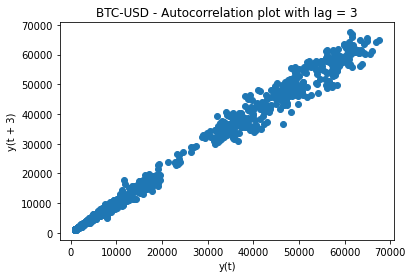

In [ ]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('BTC-USD - Autocorrelation plot with lag = 3')
plt.show()

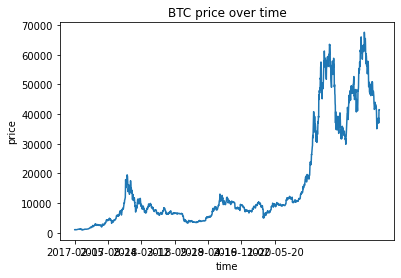

In [ ]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("BTC price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 2639112.6300919666


In [ ]:
model_fit.save("drive/MyDrive/Colab Notebooks/bitcoin5y.model")

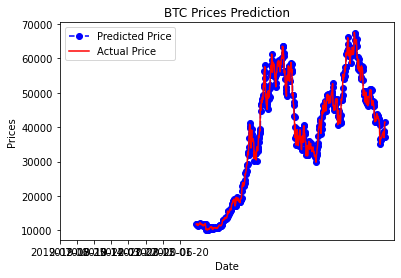

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('BTC Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()